# <h1><center>PIMA Type2 Diabetes Project</center></h1>

### <center>(Brainstation Data Science final project)</center>

## 1 Introduction

<p> Type 2 diabetes (T2D) is a chronic condition in which the body's ability to regulate glucose is impaired. It is characterized by increased glucose circulating in the bloodstream (>200 mg/dL), which (if left unmanaged) can lead to a myriad of disorders in the vascular, immune and nervious systems. </p>
<p>There are many risk factors associated with T2D such as lifestyle, age, excess weight, pregnancy, smoking and family history of diabetes. </p>
<p>Presently, there is a lack, and in many cases complete absence, of early detection of T2D. Predicting the probability of an individual's risk and susceptibility to T2D can inform a wide range of decision makers: from individual risk assessment to public health measures to reduce the burden on healthcare. The purpose of this project is to peform that early detection and predict whether an individual has diabetes based on a number of diagnostic variables using machine learning models with reasonable accuracies.</p>

### 1.1 About the dataset and variables

<p>This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK). All patients in the dataset are at least 21-year-old females. Below are the variables (columns):</p>
<p>
    <li> <b>pregs (Pregnancies)</b>: Number of times pregnant </li>
<li> <b>glu (Glucose)</b>: Plasma glucose concentration in a 2-hour oral glucose tolerance test (mg/dL) </li>
<li> <b>bp (Blood Pressure)</b>: Diastolic blood pressure (mm Hg) </li>
<li> <b>skin (Skin Thickness)</b>: Triceps skin fold thickness (mm) </li>
<li> <b>ins (Insulin)</b>: 2-hour serum insulin (mu U/ml) </li>
<li> <b>pedig (Diabetes Pedigree Function)</b>: measure of genetic predisposition to diabetes </li>
<li> <b>bmi (Body Mass Index)</b>: measure of body weight/height </li>
<li> <b>age (Age): in years </b></li>
<li> <b>outcome</b>: class variable (0= non-diabetic, 1= Diabetic)</li></p>

## 2 Results

### 2.1 Importing the relevant libraries & helper functions:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot, heatmap
import statistics as st
%matplotlib inline
import statsmodels.formula.api as smf 
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text  
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import mpl_toolkits.mplot3d as m3d
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import itertools
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [2]:
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

### 2.2 The dataset

In [3]:
dia=pd.read_csv('diabetes.csv')
dia

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#changing column names (easier to use)
dia.columns=['pregs','glu','bp','skin','ins','bmi','pedig','age','outcome']
dia.head()

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dia.dtypes

pregs        int64
glu          int64
bp           int64
skin         int64
ins          int64
bmi        float64
pedig      float64
age          int64
outcome      int64
dtype: object

There are 768 records(patients) and 9 columns (variables). All data types seem to be fine.

### 2.3 Data exploration and cleaning 

In [6]:
dia[dia.duplicated()]

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome


There are no duplicated patients.

In [7]:
dia.describe()

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There seems to be no NaN values but there are many min values at 0, which are not physiologically possible such as in glu, bp,skin and bmi. This could be missing values and will need to be replaced  since the dataset is too small to delete entire rows.

#### 2.3.1 Missing data

##### <b>glu</b>

In [8]:
# taking a closer look at all the patients with 0 glu
dia.loc[dia['glu']== 0]

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [9]:
print(dia['glu'].median())
print(dia['glu'].mean())

117.0
120.89453125


The mean and median for glu are similar, so I am replacing the missing values with the median in the following step and making sure the 0 values are gone:

In [10]:
dia['glu']=dia['glu'].replace(0,dia['glu'].median())
dia.loc[dia['glu']== 0]

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome


<AxesSubplot:xlabel='glu', ylabel='Count'>

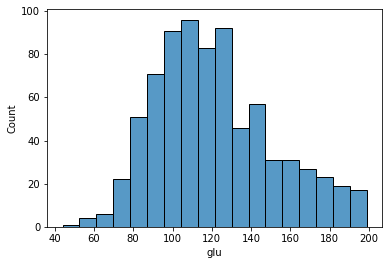

In [11]:
sns.histplot(dia['glu'], kde=False)

##### <b>bp</b>

In [12]:
# taking a closer look at all the subjects with 0 bp
dia.loc[dia['bp']== 0]

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [13]:
print(dia['bp'].median())
print(dia['bp'].mean())

72.0
69.10546875


The mean and median for bp are similar, so I am replacing the missing values with the median in the following step and making sure the 0 values are gone:

In [14]:
dia['bp']=dia['bp'].replace(0,dia['bp'].median())
dia.loc[dia['bp']== 0]

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome


<AxesSubplot:xlabel='bp', ylabel='Count'>

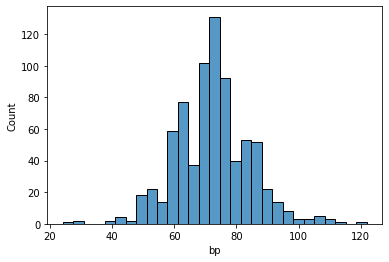

In [15]:
sns.histplot(dia['bp'], kde=False)

##### <b>skin</b>

In [16]:
# taking a closer look at all the subjects with 0 skin
dia.loc[dia['skin']== 0]

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,72,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [17]:
print(dia['skin'].median())
print(dia['skin'].mean())

23.0
20.536458333333332


The mean and median for skin are similar, so I am replacing the missing values with the median in the following step and making sure the 0 values are gone:

In [18]:
dia['skin']=dia['skin'].replace(0,dia['skin'].median())
dia.loc[dia['skin']== 0]

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome


<AxesSubplot:xlabel='skin', ylabel='Count'>

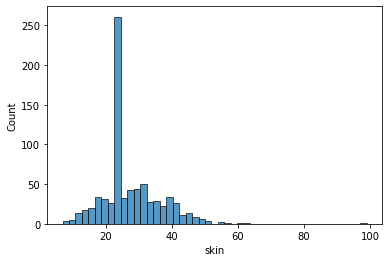

In [19]:
sns.histplot(dia['skin'], kde=False)

##### <b>ins</b>

In [20]:
# taking a closer look at all the subjects with 0 ins
dia.loc[dia['ins']== 0]

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,23,0,23.3,0.672,32,1
5,5,116,74,23,0,25.6,0.201,30,0
7,10,115,72,23,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,23,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,23,0,30.1,0.349,47,1


In [21]:
print(dia['ins'].median())
print(dia['ins'].mean())

30.5
79.79947916666667


The mean and median for ins are very different (maybe affected by outliers), so I am replacing the missing values with the median in the following step and making sure the 0 values are gone:

In [22]:
dia['ins']=dia['ins'].replace(0,dia['ins'].median())
dia.loc[dia['ins']== 0]

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome


<AxesSubplot:xlabel='ins', ylabel='Count'>

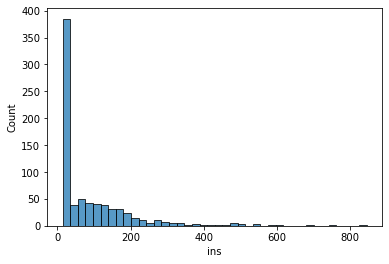

In [23]:
sns.histplot(dia['ins'], kde=False)

##### <b>bmi</b>

In [24]:
# taking a closer look at all the subjects with 0 bmi
dia.loc[dia['bmi']== 0]

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome
9,8,125,96,23,30.5,0.0,0.232,54,1
49,7,105,72,23,30.5,0.0,0.305,24,0
60,2,84,72,23,30.5,0.0,0.304,21,0
81,2,74,72,23,30.5,0.0,0.102,22,0
145,0,102,75,23,30.5,0.0,0.572,21,0
371,0,118,64,23,89.0,0.0,1.731,21,0
426,0,94,72,23,30.5,0.0,0.256,25,0
494,3,80,72,23,30.5,0.0,0.174,22,0
522,6,114,72,23,30.5,0.0,0.189,26,0
684,5,136,82,23,30.5,0.0,0.640,69,0


In [25]:
print(dia['bmi'].median())
print(dia['bmi'].mean())

32.0
31.992578124999977


The mean and median for bmi are similar, so I am replacing the missing values with the median in the following step and making sure the 0 values are gone:

In [26]:
dia['bmi']=dia['bmi'].replace(0,dia['bmi'].median())
dia.loc[dia['bmi']== 0]

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome


<AxesSubplot:xlabel='bmi', ylabel='Count'>

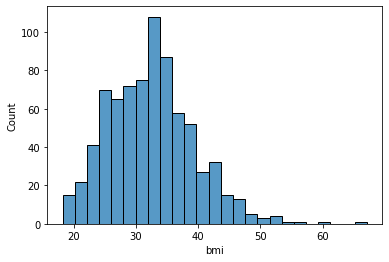

In [27]:
sns.histplot(dia['bmi'], kde=False)

#### 2.3.2 Outliers

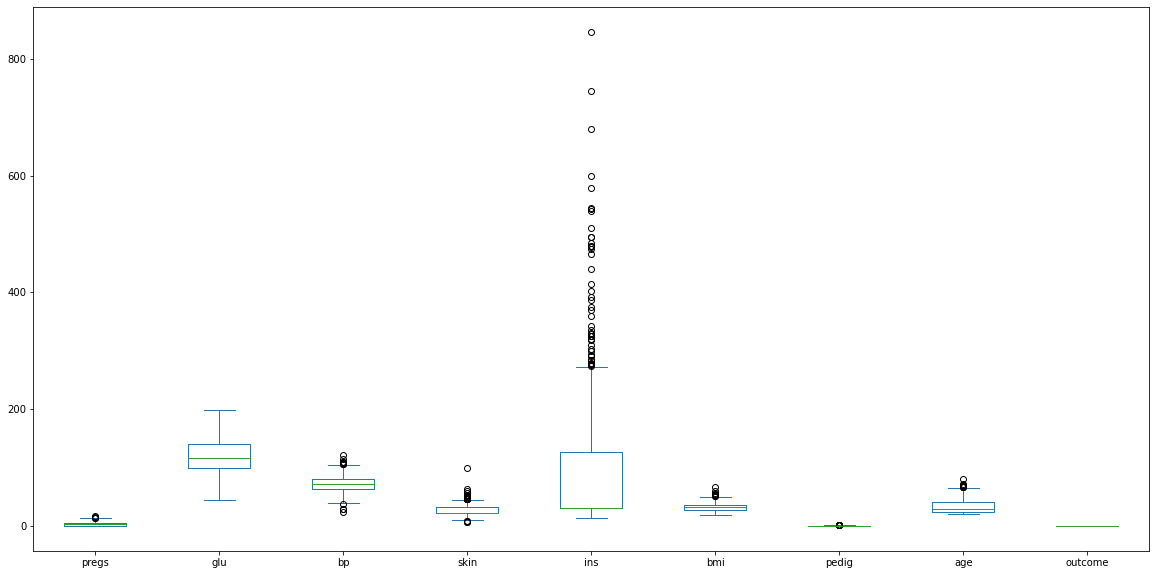

In [28]:
dia.plot(kind='box', figsize=(20,10))
plt.show()

This boxplot shows potential outliers in multiple variables. In the next section I am looking for outliers in glu, bp, skin, ins, and bmi by:
<ol> 1. Looking for spikes in the data</ol>
<ol> 2. Looking for data that are more than 3SD from the mean </ol>

##### <b>glu</b>

Looking for potential spikes in glu data:

In [29]:
(dia['glu']/dia['glu'].shift(1)).mean()

1.0634399673560413

In [30]:
dia[(dia['glu'] > 2 * dia['glu'].shift(1)) & (dia['glu'] > 2* dia['glu'].shift(-1))] 

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome
2,8,183,64,23,30.5,23.3,0.672,32,1
175,8,179,72,42,130.0,32.7,0.719,36,1
399,3,193,70,31,30.5,34.9,0.241,25,1


The above numbers are all within the possible range for glucose level. Now looking at outliers that are 3 SDs away from the mean:

In [31]:
np.where(abs(stats.zscore(dia['glu'])) > 3)

(array([], dtype=int64),)

There are no outliers that are above 3 SDs from the mean for glu.

##### <b>bp</b>

Looking for potential spikes in bp data:

In [32]:
(dia['bp']/dia['bp'].shift(1)).mean()

1.0300507680027025

In [33]:
dia[(dia['bp'] > 2 * dia['bp'].shift(1)) & (dia['bp'] > 2* dia['bp'].shift(-1))] 

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome
106,1,96,122,23,30.5,22.4,0.207,27,0


A diastolic pressure of 122 is considered a hypertensive crisis.
As such this could be an outlier (for a person who is 27, with a healthy BMI, normal glucose and skinfold). 

In [34]:
np.where(abs(stats.zscore(dia['bp'])) > 3)

(array([ 18,  43, 106, 125, 177, 549, 597, 691]),)

In [35]:
dia.iloc[[18,43,106,125,177,549,597,691]]

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome
18,1,103,30,38,83.0,43.3,0.183,33,0
43,9,171,110,24,240.0,45.4,0.721,54,1
106,1,96,122,23,30.5,22.4,0.207,27,0
125,1,88,30,42,99.0,55.0,0.496,26,1
177,0,129,110,46,130.0,67.1,0.319,26,1
549,4,189,110,31,30.5,28.5,0.680,37,0
597,1,89,24,19,25.0,27.8,0.559,21,0
691,13,158,114,23,30.5,42.3,0.257,44,1


<p>In addition to 122 being an outlier on the high end, bp of 30 and 24 are also extremely low and are likely outliers.
The rest are still within the possible pathogenic range.</p>
<p> Now I'll be replacing the outliers with bp median (72) </p>

In [36]:
dia['bp']=dia['bp'].replace(30,dia['bp'].median())
dia['bp']=dia['bp'].replace(24,dia['bp'].median())
dia['bp']=dia['bp'].replace(122,dia['bp'].median())
dia.iloc[[18,43,106,125,177,549,597,691]]

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome
18,1,103,72,38,83.0,43.3,0.183,33,0
43,9,171,110,24,240.0,45.4,0.721,54,1
106,1,96,72,23,30.5,22.4,0.207,27,0
125,1,88,72,42,99.0,55.0,0.496,26,1
177,0,129,110,46,130.0,67.1,0.319,26,1
549,4,189,110,31,30.5,28.5,0.680,37,0
597,1,89,72,19,25.0,27.8,0.559,21,0
691,13,158,114,23,30.5,42.3,0.257,44,1


##### <b>skin</b>

Looking for potential spikes in skin data:

In [37]:
(dia['skin']/dia['skin'].shift(1)).mean()

1.1154849012922143

In [38]:
dia[(dia['skin'] > 3 * dia['skin'].shift(1)) & (dia['skin'] > 3* dia['skin'].shift(-1))] 

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome
445,0,180,78,63,14.0,59.4,2.42,25,1


In [39]:
np.where(abs(stats.zscore(dia['skin'])) > 3)

(array([ 57, 120, 445, 579]),)

In [40]:
dia.iloc[[54,120,445,579]]

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome
54,7,150,66,42,342.0,34.7,0.718,42,0
120,0,162,76,56,100.0,53.2,0.759,25,1
445,0,180,78,63,14.0,59.4,2.420,25,1
579,2,197,70,99,30.5,34.7,0.575,62,1


Both 63 and 99 seem to be high. Skinfold of 63 with a high BMI pf 59 might still be possible. But a skinfold of 99 with a BMI of only 34.7 may be an outlier and should be replaced.

In [41]:
dia['skin']=dia['skin'].replace(99,dia['skin'].median())
dia.iloc[[54,120,445,579]]

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome
54,7,150,66,42,342.0,34.7,0.718,42,0
120,0,162,76,56,100.0,53.2,0.759,25,1
445,0,180,78,63,14.0,59.4,2.420,25,1
579,2,197,70,23,30.5,34.7,0.575,62,1


##### <b>ins</b>

In [42]:
np.where(abs(stats.zscore(dia['ins'])) > 3)

(array([  8,  13, 111, 153, 186, 220, 228, 247, 286, 370, 392, 409, 415,
        486, 584, 645, 655, 695, 753]),)

In [43]:
dia.iloc[[8,  13, 111, 153, 186, 220, 228, 247, 286, 370, 392, 409, 415,
        486, 584, 645, 655, 695, 753]]

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome
8,2,197,70,45,543.0,30.5,0.158,53,1
13,1,189,60,23,846.0,30.1,0.398,59,1
111,8,155,62,26,495.0,34.0,0.543,46,1
153,1,153,82,42,485.0,40.6,0.687,23,0
186,8,181,68,36,495.0,30.1,0.615,60,1
220,0,177,60,29,478.0,34.6,1.072,21,1
228,4,197,70,39,744.0,36.7,2.329,31,0
247,0,165,90,33,680.0,52.3,0.427,23,0
286,5,155,84,44,545.0,38.7,0.619,34,0
370,3,173,82,48,465.0,38.4,2.137,25,1


There seems to be many values for ins that are above 3SD from mean.

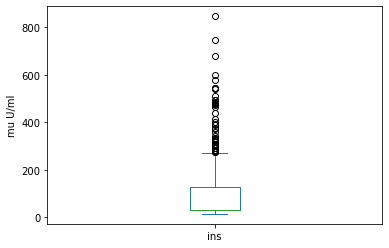

In [44]:
dia['ins'].plot(kind='box', ylabel= 'mu U/ml')
plt.show()

Looking at the boxplot for ins, the top 3 values (ins > 650) seem to be outliers. Replacing with median.

In [45]:
dia[dia['ins']>650]

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome
13,1,189,60,23,846.0,30.1,0.398,59,1
228,4,197,70,39,744.0,36.7,2.329,31,0
247,0,165,90,33,680.0,52.3,0.427,23,0


In [46]:
dia['ins'] = np.where(dia['ins'] > 650, dia['ins'].median(), dia['ins'])
dia.iloc[[13, 228, 247]]

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome
13,1,189,60,23,31.25,30.1,0.398,59,1
228,4,197,70,39,31.25,36.7,2.329,31,0
247,0,165,90,33,31.25,52.3,0.427,23,0


##### <b>bmi</b>

In [47]:
np.where(abs(stats.zscore(dia['bmi'])) > 3)

(array([120, 125, 177, 445, 673]),)

In [48]:
dia.iloc[[120, 125, 177, 445, 673]]

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome
120,0,162,76,56,100.0,53.2,0.759,25,1
125,1,88,72,42,99.0,55.0,0.496,26,1
177,0,129,110,46,130.0,67.1,0.319,26,1
445,0,180,78,63,14.0,59.4,2.420,25,1
673,3,123,100,35,240.0,57.3,0.880,22,0


BMI of 55 and up are a bit off the chart. But judging by skinfold measurement and other variables, that may still be possible.

#### 2.3.3 Pre-processing

In [49]:
#adding a new column for diabetics and non-diabetics
dia['outcome1']=np.where(dia['outcome']==0,'Non-diabetic','Diabetic')
dia.head()

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome,outcome1
0,6,148,72,35,30.5,33.6,0.627,50,1,Diabetic
1,1,85,66,29,30.5,26.6,0.351,31,0,Non-diabetic
2,8,183,64,23,30.5,23.3,0.672,32,1,Diabetic
3,1,89,66,23,94.0,28.1,0.167,21,0,Non-diabetic
4,0,137,40,35,168.0,43.1,2.288,33,1,Diabetic


### 2.4 Statistics and Visualization

#### 2.4.1 Variable comparisons: differences in variables between diabetic and non-diabetic

<p> This dataset includes many <b>risk factors</b> for T2D. For example: pregnancy, age, BMI and genetic predisposition are all considered risk factors for developing T2D. </p>
Here I perform basic comparisons in these variables between diabetic and non-diabetic patients. 
<p><li> <b>H0</b> : There are no differences in pregnancies (pregs), age, bmi and genetic predisposition (pedig) between diabetic and non-diabetic patients </li>
<li> <b>Ha </b>: Patients who have multiple pregnancies (pregs), older (age), with higher BMI (bmi) and genetic predisposition (pedig) tend to be diabetic compared to their couterparts.</li></p>
<p>I used independent t-test statistic with $ alpha $   = 0.05 and visualized the results with a barplot.</p>

<b> pregs </b>

In [50]:
diabetic=dia[dia['outcome1']=='Diabetic']['pregs']
non_dia=dia[dia['outcome1']=='Non-diabetic']['pregs']

stats.ttest_ind(diabetic,non_dia)

Ttest_indResult(statistic=6.298430550035151, pvalue=5.065127298053476e-10)

In [51]:
convert_pvalue_to_asterisks(5.065127298053476e-10)

'****'

Text(0.5, 9, '****')

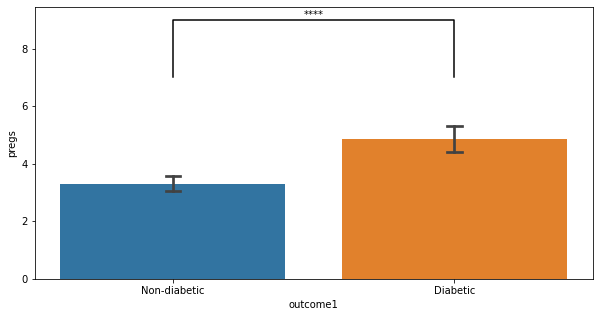

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(y=dia['pregs'],x=dia['outcome1'], order=['Non-diabetic','Diabetic'], palette="tab10", capsize=.05)
x1, x2 = 0, 1   # columns 'diabetic' and 'non-diabetic' 
y, h, col = dia['pregs'].max() -10, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*0.5, y+h, convert_pvalue_to_asterisks(5.065127298053476e-10), ha='center', va='bottom', color=col)

<b> age </b>

In [53]:
diabetic=dia[dia['outcome1']=='Diabetic']['age']
non_dia=dia[dia['outcome1']=='Non-diabetic']['age']

stats.ttest_ind(diabetic,non_dia)

Ttest_indResult(statistic=6.792688071649956, pvalue=2.2099754606654358e-11)

In [54]:
convert_pvalue_to_asterisks(2.2099754606654358e-11)

'****'

Text(0.5, 49, '****')

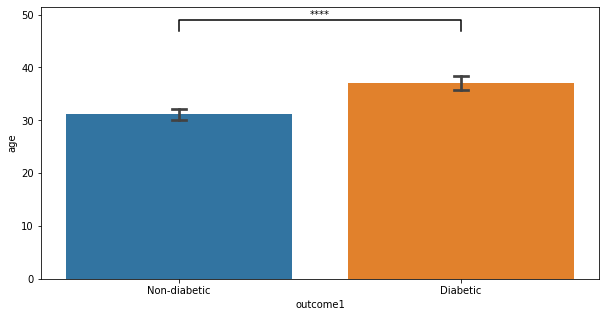

In [55]:
plt.figure(figsize=(10,5))
sns.barplot(y=dia['age'],x=dia['outcome1'], order=['Non-diabetic','Diabetic'], palette="tab10", capsize=.05)
x1, x2 = 0, 1   # columns 'diabetic' and 'non-diabetic' 
y, h, col = dia['pregs'].max() +30, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*0.5, y+h, convert_pvalue_to_asterisks(2.2099754606654358e-11), ha='center', va='bottom', color=col)

<b> bmi </b>

In [56]:
diabetic=dia[dia['outcome1']=='Diabetic']['bmi']
non_dia=dia[dia['outcome1']=='Non-diabetic']['bmi']

stats.ttest_ind(diabetic,non_dia)

Ttest_indResult(statistic=9.096864830220028, pvalue=7.879147621569232e-19)

In [57]:
convert_pvalue_to_asterisks(7.879147621569232e-19)

'****'

Text(0.5, 49.099999999999994, '****')

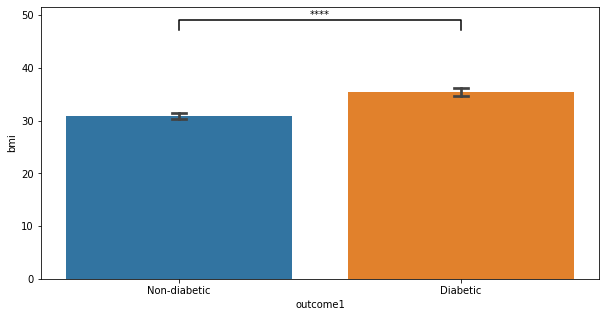

In [58]:
plt.figure(figsize=(10,5))
sns.barplot(y=dia['bmi'],x=dia['outcome1'], order=['Non-diabetic','Diabetic'], palette="tab10", capsize=.05)
x1, x2 = 0, 1   # columns 'diabetic' and 'non-diabetic' 
y, h, col = dia['bmi'].max()-20, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*0.5, y+h, convert_pvalue_to_asterisks(7.879147621569232e-19), ha='center', va='bottom', color=col)

<b> pedig </b>

In [59]:
diabetic=dia[dia['outcome1']=='Diabetic']['pedig']
non_dia=dia[dia['outcome1']=='Non-diabetic']['pedig']

stats.ttest_ind(diabetic,non_dia)

Ttest_indResult(statistic=4.88582646072744, pvalue=1.254607010148809e-06)

In [60]:
convert_pvalue_to_asterisks(1.254607010148809e-06)

'****'

Text(0.5, 3.42, '****')

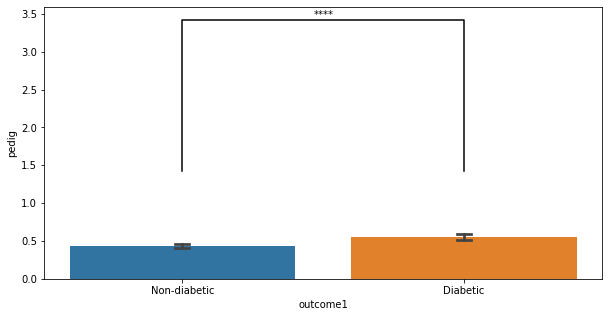

In [61]:
plt.figure(figsize=(10,5))
sns.barplot(y=dia['pedig'],x=dia['outcome1'], order=['Non-diabetic','Diabetic'], palette="tab10", capsize=.05)
x1, x2 = 0, 1   # columns 'diabetic' and 'non-diabetic' 
y, h, col = dia['pedig'].max()-1, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*0.5, y+h, convert_pvalue_to_asterisks(1.254607010148809e-06), ha='center', va='bottom', color=col)

<b> Conclusion: </b> 
<p>Diabetics have significantly higher risk factors (pregs, bmi, pedig, age), compared to non-diabetics. </p>
-----

<p> T2D is characterized by increased glucose level and  impairment in insulin levels. Insulin can be low and may not be sufficient to process all the glucose present in the bloodstream, or it could be too high which indicates insulin resistance. There are other physiological systems which can be affected by T2D such as bp. </p>
<p>Here I perform further comparisons in glu, ins, and bp between diabetic and non-diabetic patients. 
<p><li> <b>H0</b> : There are no differences in glu, ins and bp between diabetic and non-diabetic patients </li>
<li> <b>Ha</b> : Patients who are diabetic tend to have higher glu, ins, and bp compared to their couterparts.</li></p>
<p>I used independent t-test statistic with $ alpha $ = 0.05 and visualized the results with a boxplot.</p>

<b> glu </b>

In [62]:
diabetic=dia[dia['outcome1']=='Diabetic']['glu']
non_dia=dia[dia['outcome1']=='Non-diabetic']['glu']

stats.ttest_ind(diabetic,non_dia)

Ttest_indResult(statistic=15.673795182294105, pvalue=3.1287190418423694e-48)

In [63]:
convert_pvalue_to_asterisks(3.1287190418423694e-48)

'****'

Text(0.5, 221, '****')

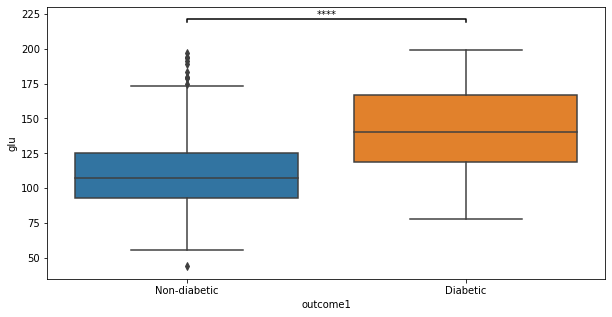

In [64]:
plt.figure(figsize=(10,5))
sns.boxplot(y=dia['glu'],x=dia['outcome1'], order=['Non-diabetic','Diabetic'], palette="tab10")
x1, x2 = 0, 1   # columns 'diabetic' and 'non-diabetic' 
y, h, col = dia['glu'].max() + 20, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*0.5, y+h, convert_pvalue_to_asterisks(3.1287190418423694e-48), ha='center', va='bottom', color=col)

<b> ins </b>

In [65]:
diabetic=dia[dia['outcome1']=='Diabetic']['ins']
non_dia=dia[dia['outcome1']=='Non-diabetic']['ins']

stats.ttest_ind(diabetic,non_dia)

Ttest_indResult(statistic=4.48390034900342, pvalue=8.450597170137498e-06)

In [66]:
convert_pvalue_to_asterisks(8.450597170137498e-06)

'****'

Text(0.5, 622.0, '****')

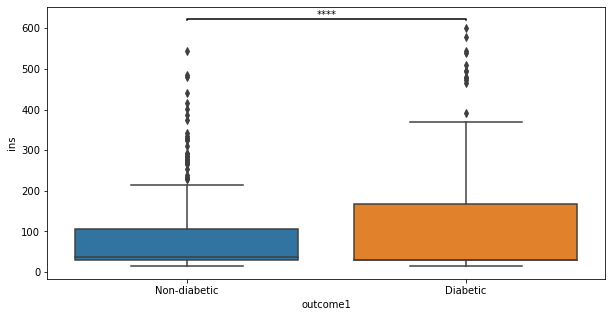

In [67]:
plt.figure(figsize=(10,5))
sns.boxplot(y=dia['ins'],x=dia['outcome1'], order=['Non-diabetic','Diabetic'], palette="tab10")
x1, x2 = 0, 1   # columns 'diabetic' and 'non-diabetic' 
y, h, col = dia['ins'].max() + 20, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*0.5, y+h, convert_pvalue_to_asterisks(8.450597170137498e-06), ha='center', va='bottom', color=col)

<b> bp </b>

In [68]:
diabetic=dia[dia['outcome1']=='Diabetic']['bp']
non_dia=dia[dia['outcome1']=='Non-diabetic']['bp']

stats.ttest_ind(diabetic,non_dia)

Ttest_indResult(statistic=4.932219615034056, pvalue=9.97521296469224e-07)

In [69]:
convert_pvalue_to_asterisks(9.97521296469224e-07)

'****'

Text(0.5, 136, '****')

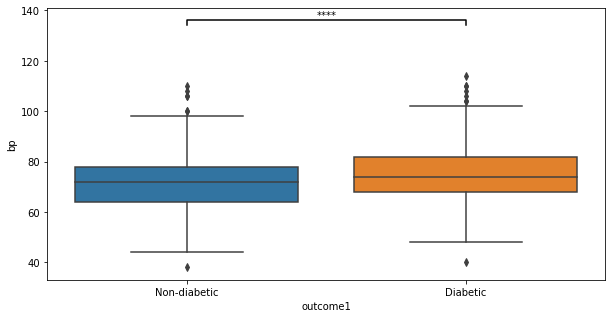

In [70]:
plt.figure(figsize=(10,5))
sns.boxplot(y=dia['bp'],x=dia['outcome1'], order=['Non-diabetic','Diabetic'], palette="tab10")
x1, x2 = 0, 1   # columns 'diabetic' and 'non-diabetic' 
y, h, col = dia['bp'].max() + 20, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*0.5, y+h, convert_pvalue_to_asterisks(9.97521296469224e-07), ha='center', va='bottom', color=col)

<b> Conclusion: </b> 
<p>Diabetics have a significantly higher bp, ins, and glu levels, compared to non-diabetics. </p>
------

#### 2.4.2 Correlation 

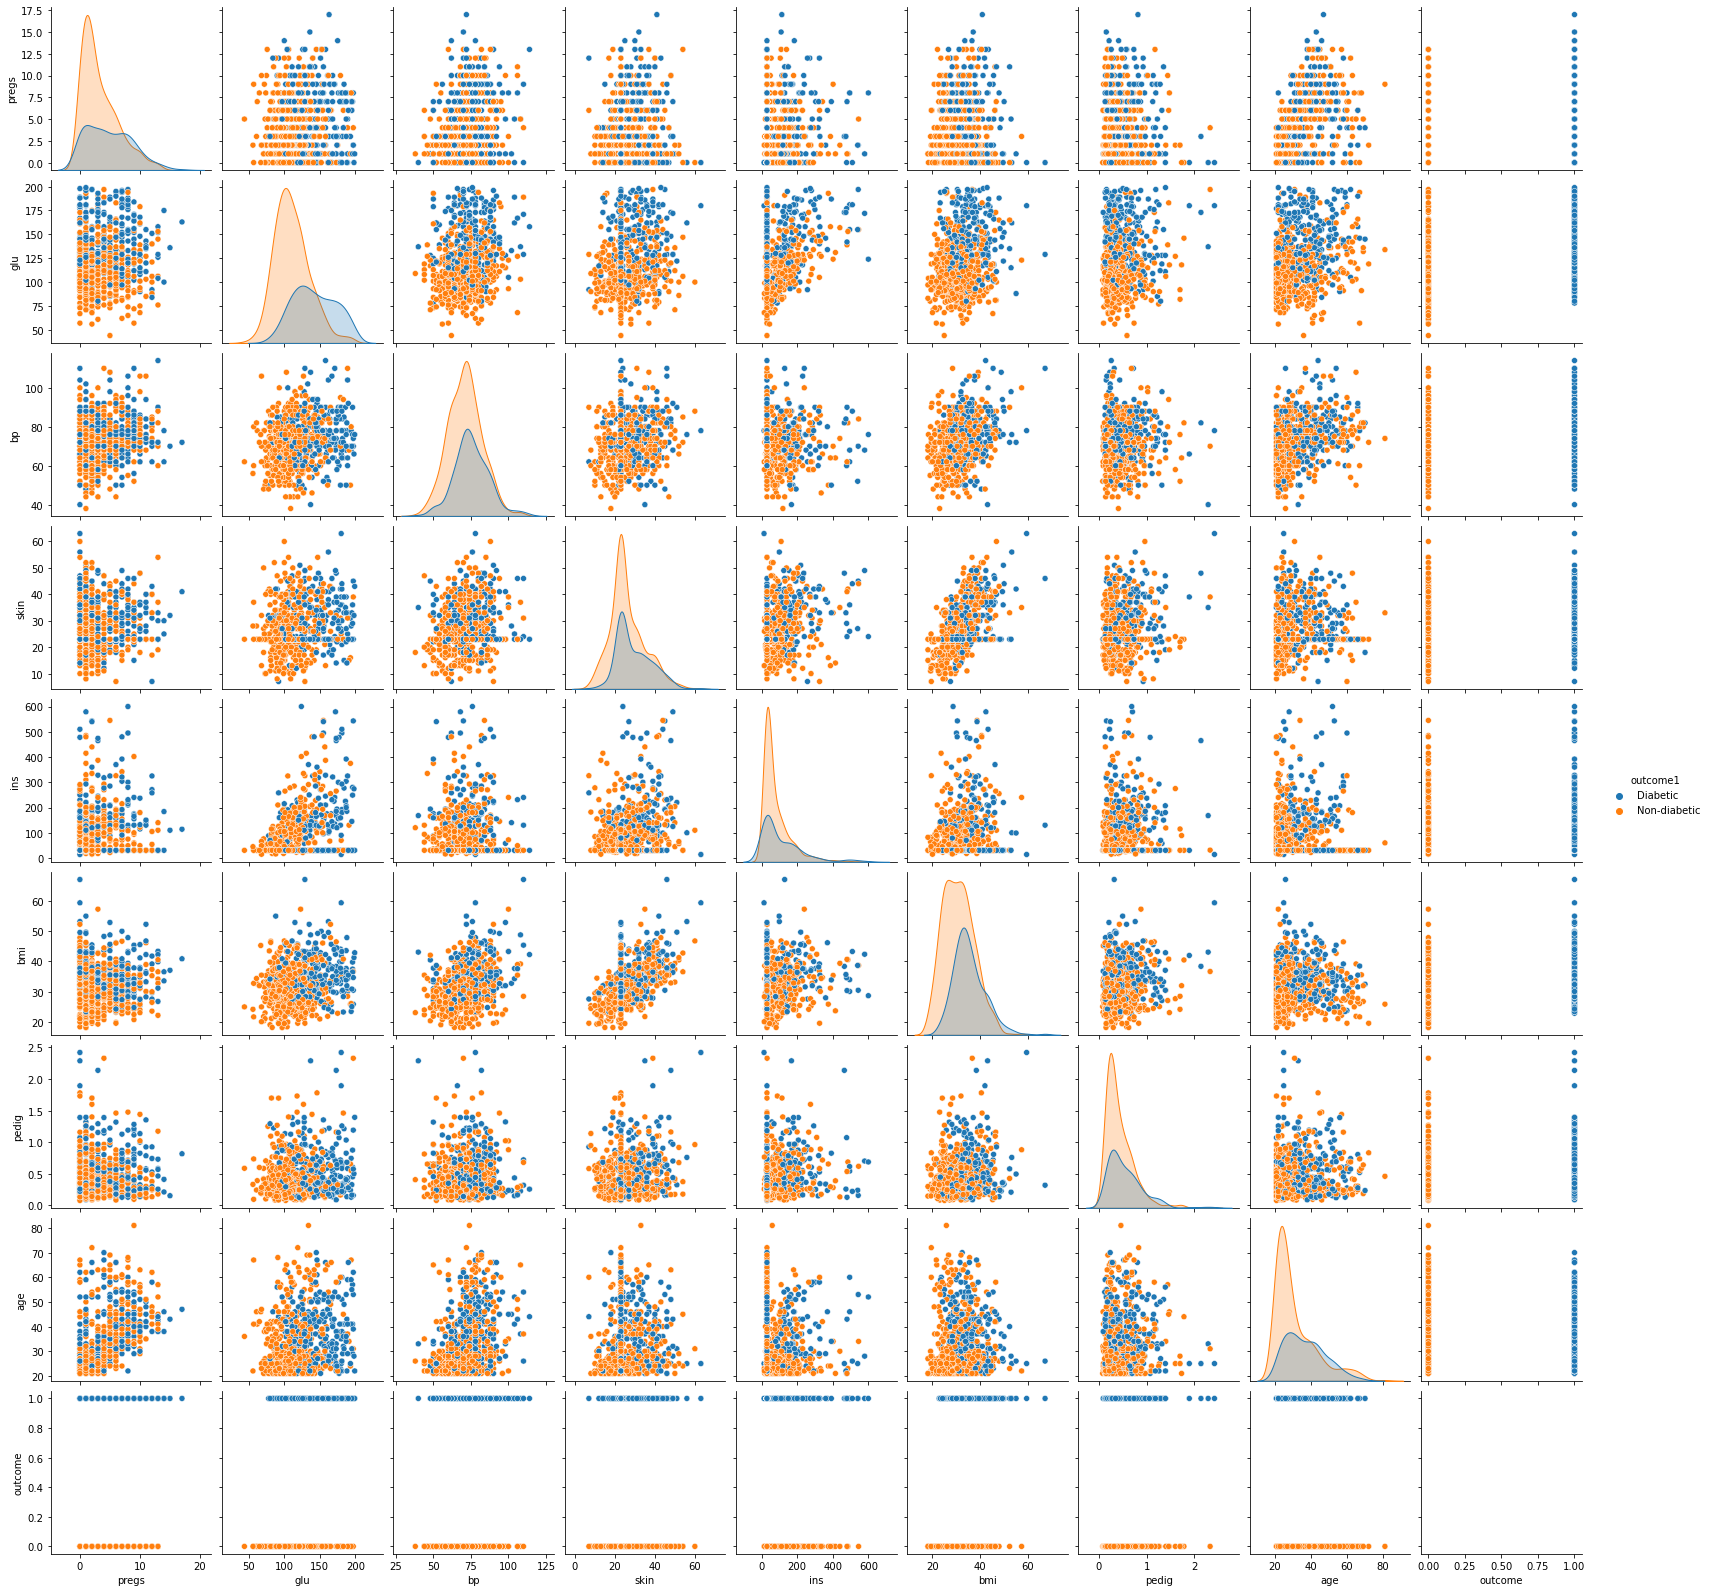

In [71]:
pairplot(dia, hue='outcome1')

In [72]:
dia.corr()

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome
pregs,1.000000,0.128213,0.209136,0.040050,-0.041835,0.021546,-0.033523,0.544341,0.221898
glu,0.128213,1.000000,0.218489,0.151636,0.328609,0.231400,0.137327,0.266909,0.492782
bp,0.209136,0.218489,1.000000,0.173616,-0.032300,0.319703,-0.000340,0.332190,0.175444
skin,0.040050,0.151636,0.173616,1.000000,0.264130,0.566096,0.145457,0.029436,0.181681
ins,-0.041835,0.328609,-0.032300,0.264130,1.000000,0.178267,0.143593,-0.031328,0.159925
bmi,0.021546,0.231400,0.319703,0.566096,0.178267,1.000000,0.153506,0.025744,0.312249
pedig,-0.033523,0.137327,-0.000340,0.145457,0.143593,0.153506,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.332190,0.029436,-0.031328,0.025744,0.033561,1.000000,0.238356
outcome,0.221898,0.492782,0.175444,0.181681,0.159925,0.312249,0.173844,0.238356,1.000000


<AxesSubplot:>

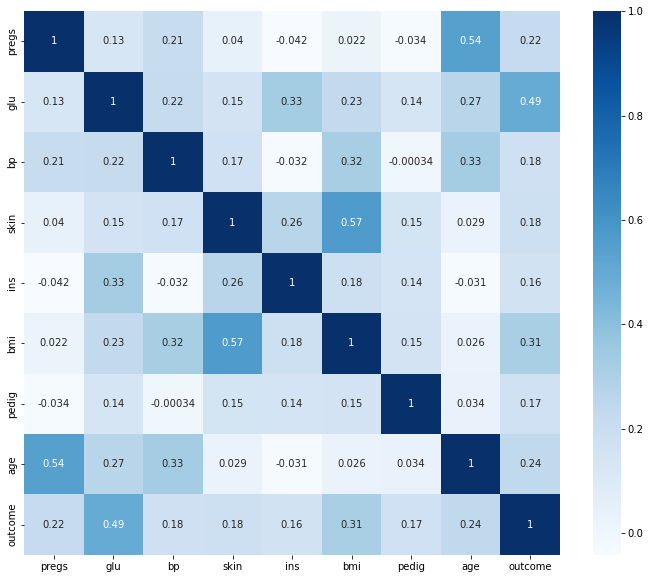

In [73]:
plt.figure(figsize=(12,10))  
heatmap(dia.corr(), annot=True, cmap=plt.cm.Blues)

In [74]:
dia_corr = dia.corr()
dia_corr_f = dia_corr[((dia_corr >= .4) | (dia_corr <= -.4)) & (dia_corr != 1)]
dia_corr_f = dia_corr_f.fillna('')
dia_corr_f

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome
pregs,,,,,,,,0.544341,
glu,,,,,,,,,0.492782
bp,,,,,,,,,
skin,,,,,,0.566096,,,
ins,,,,,,,,,
bmi,,,,0.566096,,,,,
pedig,,,,,,,,,
age,0.544341,,,,,,,,
outcome,,0.492782,,,,,,,


These data do not show great correlations between the different variables. The highest correlation is between bmi and skin, becuase they are both loosely indicative of the patient's weight/body composition.

#### 2.4.3 Feature Engineering

In [75]:
#creating glu categories depending on glu levels in the literature
dia.loc[(dia['glu'] <=140), 'status']= 'Normal'
dia.loc[(dia['glu'] >140)&(dia['glu'] < 200), 'status']= 'Pre-diabetic'
dia.loc[(dia['glu'] >=200), 'status']='Diabetic'
dia.head()

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome,outcome1,status
0,6,148,72,35,30.5,33.6,0.627,50,1,Diabetic,Pre-diabetic
1,1,85,66,29,30.5,26.6,0.351,31,0,Non-diabetic,Normal
2,8,183,64,23,30.5,23.3,0.672,32,1,Diabetic,Pre-diabetic
3,1,89,66,23,94.0,28.1,0.167,21,0,Non-diabetic,Normal
4,0,137,40,35,168.0,43.1,2.288,33,1,Diabetic,Normal


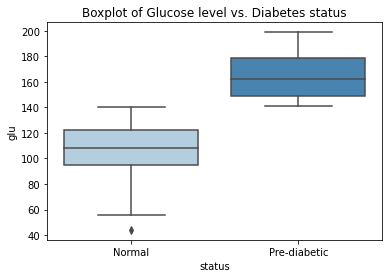

In [76]:
ax=sns.boxplot(x='status', y="glu", data=dia, palette="Blues", order = ['Normal','Pre-diabetic'])
plt.title("Boxplot of Glucose level vs. Diabetes status")
plt.show()

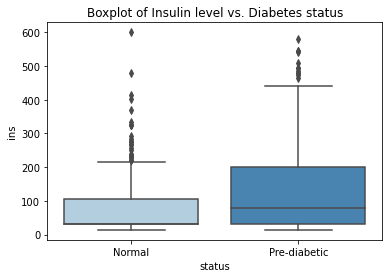

In [77]:
ax=sns.boxplot(x='status', y="ins", data=dia, palette="Blues", order = ['Normal','Pre-diabetic'])
plt.title("Boxplot of Insulin level vs. Diabetes status")
plt.show()

Employing the feature engineering above, we can further explore the relationship between normal and pre-diabetic with respect to glu and ins level using visualization (scatterplot) and linear regression.

Text(0.5, 1.0, 'A scatterplot of Glucose and Insulin levels')

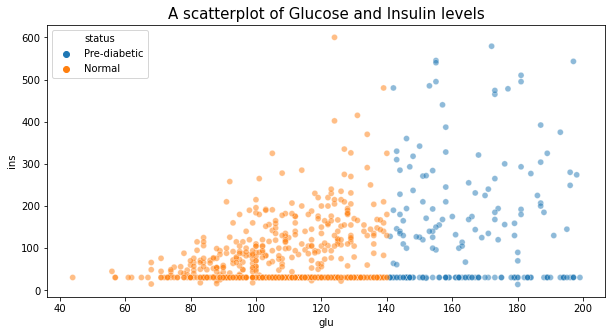

In [78]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=dia, x='glu', y='ins', hue='status' ,alpha=0.5)
plt.title('A scatterplot of Glucose and Insulin levels',size=15)

This scatterplot shows a positive correlation between ins and glu. As glu increases, so does ins. As expected, pre-diabetics have higher glu and ins levels compared to normal patients. We can confirm this relationship further using linear regression.

In [79]:
dia_linear = smf.ols("glu ~ ins ", data=dia).fit()  
dia_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    glu   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     92.73
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           8.53e-21
Time:                        16:27:50   Log-Likelihood:                -3668.6
No. Observations:                 768   AIC:                             7341.
Df Residuals:                     766   BIC:                             7351.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    112.1915      1.430     78.481      0.000     109.385     114.998
ins            0.1031      0.011      9.630      0.000       0.082       0.124
==============================================================================
Omnibus:                       49.848   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.456
Skew:                           0.675   Prob(JB):                     2.03e-13
Kurtosis:                       3.075   Cond. No.                         184.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The linear regression model (112.2 + 0.1 x + e) shows a significant correlation between ins and glu levels, however, the correlation is small (R-squared=0.12). As glu increases, ins level increases only by 0.1. 

### 2.5 Modelling 

<p>In this section I am performing different algorithms to predict whether a patient has diabetes or not. Because my outcome is categorical (0,1) I will be using classification models: Logistic Regression, Naive Bayes, Decision Trees and Random Forests. </p>

In [80]:
dia.head()

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome,outcome1,status
0,6,148,72,35,30.5,33.6,0.627,50,1,Diabetic,Pre-diabetic
1,1,85,66,29,30.5,26.6,0.351,31,0,Non-diabetic,Normal
2,8,183,64,23,30.5,23.3,0.672,32,1,Diabetic,Pre-diabetic
3,1,89,66,23,94.0,28.1,0.167,21,0,Non-diabetic,Normal
4,0,137,40,35,168.0,43.1,2.288,33,1,Diabetic,Normal


But first, I will use <b>feature selection</b> to exclude the least important features in my models. Based on my previous analysis, both bmi and skin may have similar impact on diabetes. Therefore I will be experimenting with excluding skin from the modeling.

#### 2.5.1 Dataset splitting

In [81]:
dia.drop(['status'],axis=1,inplace=True)
dia

,pregs,glu,bp,skin,ins,bmi,pedig,age,outcome,outcome1
0,6,148,72,35,30.5,33.6,0.627,50,1,Diabetic
1,1,85,66,29,30.5,26.6,0.351,31,0,Non-diabetic
2,8,183,64,23,30.5,23.3,0.672,32,1,Diabetic
3,1,89,66,23,94.0,28.1,0.167,21,0,Non-diabetic
4,0,137,40,35,168.0,43.1,2.288,33,1,Diabetic
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0,Non-diabetic
764,2,122,70,27,30.5,36.8,0.340,27,0,Non-diabetic
765,5,121,72,23,112.0,26.2,0.245,30,0,Non-diabetic
766,1,126,60,23,30.5,30.1,0.349,47,1,Diabetic


In [82]:
#output
y=dia['outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: outcome, Length: 768, dtype: int64

In [83]:
#input1
X=dia.drop(['outcome','outcome1'],axis=1)
X

,pregs,glu,bp,skin,ins,bmi,pedig,age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [84]:
#input2: excluding skin
X2=dia.drop(['outcome','outcome1','skin'],axis=1)
X2

,pregs,glu,bp,ins,bmi,pedig,age
0,6,148,72,30.5,33.6,0.627,50
1,1,85,66,30.5,26.6,0.351,31
2,8,183,64,30.5,23.3,0.672,32
3,1,89,66,94.0,28.1,0.167,21
4,0,137,40,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...
763,10,101,76,180.0,32.9,0.171,63
764,2,122,70,30.5,36.8,0.340,27
765,5,121,72,112.0,26.2,0.245,30
766,1,126,60,30.5,30.1,0.349,47


In [85]:
#splitting1
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state = 0)

print('x_train size:', X_train.shape)
print('y_train size:', y_train.shape)
print('x_test size:', X_test.shape)
print('y_test size:', y_test.shape)

x_train size: (614, 8)
y_train size: (614,)
x_test size: (154, 8)
y_test size: (154,)


In [86]:
#splitting2
X2_train,X2_test,y_train,y_test=train_test_split(X2,y,test_size=0.2, random_state = 0)

print('x_train size:', X2_train.shape)
print('y_train size:', y_train.shape)
print('x_test size:', X2_test.shape)
print('y_test size:', y_test.shape)

x_train size: (614, 7)
y_train size: (614,)
x_test size: (154, 7)
y_test size: (154,)


#### 2.5.2 Logistic Regression

Using logistic regression, I am examinig the model fit using different solvers (liblinear is good for smaller datasets, and newton-cg is good with multiclass datasets both of which apply to my dataset). I will be experimenting with the different solvers in addition to experimenting with feature selection.

In [87]:
dia_model1=linear_model.LogisticRegression(solver='liblinear')
dia_model1.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [88]:
dia_model1.score(X_test,y_test)

0.7792207792207793

In [89]:
dia_model1_1=linear_model.LogisticRegression(solver='newton-cg')
dia_model1_1.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [90]:
dia_model1_1.score(X_test,y_test)

0.8116883116883117

It appears that newton-cg solver works better at predicing the outcome (81%) than liblinear solver (78%)
Now, trying both solvers with excluding skin

In [91]:
dia_model2=linear_model.LogisticRegression(solver='liblinear')
dia_model2.fit(X2_train,y_train)

LogisticRegression(solver='liblinear')

In [92]:
dia_model2.score(X2_test,y_test)

0.7922077922077922

dia_model2.score(X2_test,y_test)

In [93]:
dia_model2_1=linear_model.LogisticRegression(solver='newton-cg')
dia_model2_1.fit(X2_train,y_train)

LogisticRegression(solver='newton-cg')

In [94]:
dia_model2_1.score(X2_test,y_test)

0.8116883116883117

<p>Excluding skin improved the accuracy score with liblinear compared to using all the variables, but had no effect on accuracy score when newton-cg solver was used. </p>
<b>Conclusion: Using logistic Regression, the best accuracy score (81%) was achieved using solver: newton-cg.</b>

##### Model Evaluation

In [95]:
logist_pred= dia_model2_1.predict(X2_test)
logist_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [96]:
print('R-squared value is', r2_score(y_test, logist_pred))
print('MAE is', mean_absolute_error(y_test, logist_pred))

R-squared value is 0.11195068602107783
MAE is 0.18831168831168832


R2 valuse is very low which may indicate a poor fit? but the value of MAE is also low which indicates that error is low. 

#### 2.5.3 Naive Bayes

Using Naive Bayes, I am once again examinig the model fit using different versions (GuassianNB and BernoulliNB) GuassianNB is suitable for continous data, while BernoulliNB is suitable for binary outcome, both of which apply to my dataset. I will not be using Multiomial here because it is more suitable with counts which does not apply to my dataset. I will be experimenting with the different  Naive Bayes types addition to experimenting with feature selection.

In [97]:
dia_naive = GaussianNB()
dia_naive.fit(X_train,y_train)

dia_naive.score(X_test,y_test)

0.7857142857142857

In [98]:
dia_bern=BernoulliNB()
dia_bern.fit(X_train,y_train)

dia_bern.score(X_test,y_test)

0.6948051948051948

In [99]:
dia_naive2 = GaussianNB()
dia_naive2.fit(X2_train,y_train)

dia_naive2.score(X2_test,y_test)

0.7922077922077922

In [100]:
dia_bern2=BernoulliNB()
dia_bern2.fit(X2_train,y_train)

dia_bern2.score(X2_test,y_test)

0.6948051948051948

<p>Using GuassanNB type of Naive Bayes achieved a better score than using BernoulliNB. Excluding skin improved the accuracy score only with  GassuaianNB.</p>
<b>Conclusion: Using Naive Bayes, the best accuracy score (79%) was achieved using type GuassianNB and excluding skin from the model. In General, I achived better accuracy scores using Logistic Regression</b>

#### 2.5.4 Decision Trees

Using Decision Tree classifier, I am examining the model fit using different criteria (intropy and gini) and different mex_depths, in addition to experimenting with feature selection. But first, let's decide the optimal max_depth:

In [101]:
# Define a range of depth values to try
depth_values = range(1, 15)

# Create placeholder lists to append our scores to
train_scores = []
test_scores = []


# Loop through each depth value
for d in depth_values:

    # Create and fit a decision tree with that depth
    dt = tree.DecisionTreeClassifier(max_depth=d)
    dt.fit(X2_train, y_train)

    # Calculate train and test accuracies
    train_acc = dt.score(X2_train, y_train)
    test_acc = dt.score(X2_test, y_test)

    # Append them to our lists
    train_scores.append(train_acc)
    test_scores.append(test_acc)

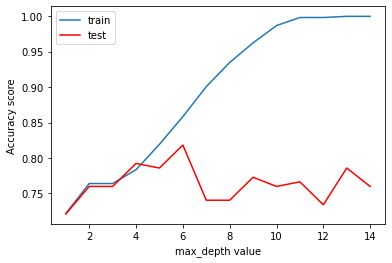

In [102]:
plt.figure()
plt.plot(depth_values, train_scores, label='train')
plt.plot(depth_values, test_scores, label='test', c='r')
plt.xlabel('max_depth value')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

This shows that the optimum max_depth is 6

In [103]:
dia_tree1 = tree.DecisionTreeClassifier(criterion='gini', max_depth=6)
dia_tree1.fit(X_train, y_train)

print(dia_tree1.score(X_train, y_train))
print(dia_tree1.score(X_test, y_test))

0.8599348534201955
0.8181818181818182


In [104]:
dia_tree1_1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)
dia_tree1_1.fit(X_train, y_train)

print(dia_tree1_1.score(X_train, y_train))
print(dia_tree1_1.score(X_test, y_test))

0.8208469055374593
0.7792207792207793


In [105]:
dia_tree2 = tree.DecisionTreeClassifier(criterion='gini', max_depth=6)
dia_tree2.fit(X2_train, y_train)

print(dia_tree2.score(X2_train, y_train))
print(dia_tree2.score(X2_test, y_test))

0.8583061889250815
0.8246753246753247


In [106]:
dia_tree2_1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)
dia_tree2_1.fit(X2_train, y_train)

print(dia_tree2_1.score(X2_train, y_train))
print(dia_tree2_1.score(X2_test, y_test))

0.8175895765472313
0.7792207792207793


<p>Using Decision tree classifier, a better score was achieved using the gini criterion. Excluding skin slightly improved accuracy score.</p>
<b>Conclusion: Using Decision Tree Classifier, the best accuracy score (82%) was achieved using gini criterion, max_dept=6 and excluding skin.</b>

##### Model Evaluation

In [107]:
test_pred_class = dia_tree2.predict(X2_test)

print(metrics.accuracy_score(y_test, test_pred_class))

0.8246753246753247


Confusion matrix, without normalization
[[93 14]
 [14 33]]
Normalized confusion matrix
[[0.87 0.13]
 [0.3  0.7 ]]


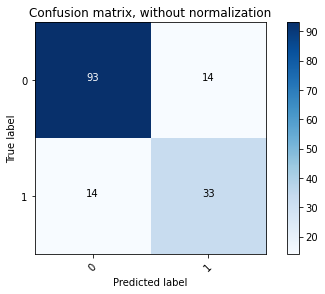

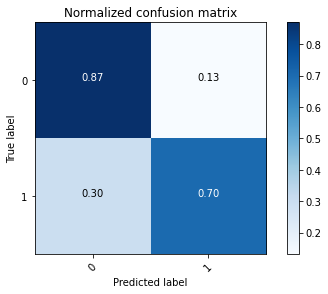

In [108]:
import itertools
from sklearn import svm
from sklearn.metrics import confusion_matrix

y_pred = dia_tree2.fit(X2_train, y_train).predict(X2_test)
class_names = dia_tree2.classes_

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Using the confusion matrix to evaluate my model, it appears the model correctly predicted 92 (86%) cases to be non-diabetic, and correctly predicted 33 (70%) cases to be diabetic. The model, however, incorrectly predicted 15 (14%) cases to be diabetic where in fact they were non-diabetic (false positive, Type II error) and incorrectly predicted 14 (30%) cases to be non-diabetic where in fact they were (false negative, Type I error).

#### 2.5.5 Random Forests

Finally, I am using random forests to examine the model fit using max_depth=6 and experimenting with criteria and feature selection. 

In [109]:
dia_rand1 = RandomForestClassifier(max_depth=6, criterion = 'gini', random_state = 5)

dia_rand1.fit(X_train, y_train)

print(f'model score on training data: {dia_rand1.score(X_train, y_train)}')
print(f'model score on testing data: {dia_rand1.score(X_test, y_test)}')

model score on training data: 0.8745928338762216
model score on testing data: 0.8116883116883117


In [110]:
dia_rand1_1 = RandomForestClassifier(max_depth=6, criterion = 'entropy', random_state = 5)

dia_rand1_1.fit(X_train, y_train)

print(f'model score on training data: {dia_rand1_1.score(X_train, y_train)}')
print(f'model score on testing data: {dia_rand1_1.score(X_test, y_test)}')

model score on training data: 0.8534201954397395
model score on testing data: 0.8311688311688312


In [111]:
dia_rand2 = RandomForestClassifier(max_depth=6, criterion = 'gini', random_state = 5)

dia_rand2.fit(X2_train, y_train)

print(f'model score on training data: {dia_rand2.score(X2_train, y_train)}')
print(f'model score on testing data: {dia_rand2.score(X2_test, y_test)}')

model score on training data: 0.8876221498371335
model score on testing data: 0.8441558441558441


In [112]:
dia_rand2_1 = RandomForestClassifier(max_depth=6, criterion = 'entropy', random_state = 5)

dia_rand2_1.fit(X2_train, y_train)

print(f'model score on training data: {dia_rand2_1.score(X2_train, y_train)}')
print(f'model score on testing data: {dia_rand2_1.score(X2_test, y_test)}')

model score on training data: 0.8697068403908795
model score on testing data: 0.8441558441558441


<p>Using Random Forest Classifier, a better score was achieved using the gini criterion. Excluding skin improved the accuracy score slightly. But using gini vs entropy solver did not affect the accuracy score much</p>
<b>Conclusion: Random Forest Classifer, the best accuracy score (84%) was achieved using max_dept=6, and excluding skin from the model.</b>

##### Model Evaluation

In [113]:
pred_class = dia_rand2.predict(X2_test)

print(metrics.accuracy_score(y_test, pred_class))

0.8441558441558441


Confusion matrix, without normalization
[[97 10]
 [14 33]]
Normalized confusion matrix
[[0.91 0.09]
 [0.3  0.7 ]]


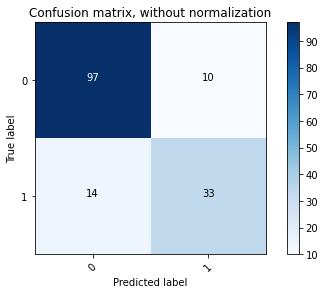

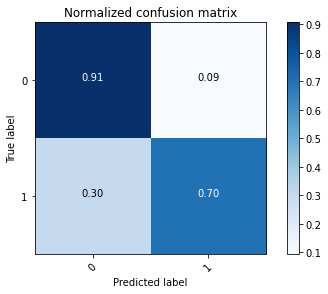

In [114]:
y_pred = dia_rand2.fit(X2_train, y_train).predict(X2_test)
class_names = dia_rand2.classes_

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Using the confusion matrix to evaluate my model, it appears the model correctly predicted 97 (91%) cases to be non-diabetic, and correctly predicted 33 (70%) cases to be diabetic. The model, however, incorrectly predicted 10 (9%) cases to be diabetic where in fact they were non-diabetic (false positive, Type II error) and incorrectly predicted 14 (30%) cases to be non-diabetic where in fact they were (false negative, Type I error).

#### 2.5.6 Further optimzation using feature importance & Hyperparameter tuning

In [115]:
importances = dia_rand2.feature_importances_

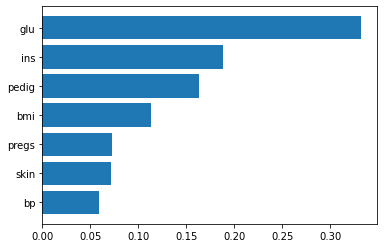

In [116]:
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

Based on the above bargraph, the least important is bp. Here I exclude it from the random forest classifier along with skin:

In [122]:
#input3: excluding skin and bp
X3=dia.drop(['outcome','outcome1','bp','skin'],axis=1)
X3

,pregs,glu,ins,bmi,pedig,age
0,6,148,30.5,33.6,0.627,50
1,1,85,30.5,26.6,0.351,31
2,8,183,30.5,23.3,0.672,32
3,1,89,94.0,28.1,0.167,21
4,0,137,168.0,43.1,2.288,33
...,...,...,...,...,...,...
763,10,101,180.0,32.9,0.171,63
764,2,122,30.5,36.8,0.340,27
765,5,121,112.0,26.2,0.245,30
766,1,126,30.5,30.1,0.349,47


In [123]:
#splitting3
X3_train,X3_test,y_train,y_test=train_test_split(X3,y,test_size=0.2, random_state = 0)

print('x_train size:', X3_train.shape)
print('y_train size:', y_train.shape)
print('x_test size:', X3_test.shape)
print('y_test size:', y_test.shape)

x_train size: (614, 6)
y_train size: (614,)
x_test size: (154, 6)
y_test size: (154,)


In [124]:
dia_rand3 = RandomForestClassifier(max_depth=6, criterion = 'gini')

dia_rand3.fit(X3_train, y_train)

print(f'model score on training data: {dia_rand3.score(X3_train, y_train)}')
print(f'model score on testing data: {dia_rand3.score(X3_test, y_test)}')

model score on training data: 0.8827361563517915
model score on testing data: 0.8116883116883117


Excluding bp from the model, did not improve the accuracy score. Therefore, bp can be included.

Below, I am trying hyperparameter tuning by changing the default on the min_samples_split to 6 and trying on training set excluding only skin:

In [126]:
dia_rand4 = RandomForestClassifier(max_depth=6, criterion = 'gini', min_samples_split=6)

dia_rand4.fit(X2_train, y_train)

print(f'model score on training data: {dia_rand4.score(X2_train, y_train)}')
print(f'model score on testing data: {dia_rand4.score(X2_test, y_test)}')

model score on training data: 0.8729641693811075
model score on testing data: 0.8181818181818182


## 3 Conclusion

In conlcusion, among the models examined, the best models to predict whether a person is diabetic or not is the Random Forest Tree Classifier with excluding the variable 'skin', and min_samples_split=6 and max_depth=6. This model correctly predicts the outcome 84% ofthe time. The model can probably be more optimzed using further hyperparamter optimzation, more rigourous feature selection and importance, and better replacement of outliers.  

Clinical diabetes is usually diagnosed with glucose levels over 200 mg/dL. However, the current dataset includes diabetic patients whose glucose level is less than 200 mg/dL. This discrepancy may be possible due to medications keeping the glucose level below a certain level. Presenting a bias in the dataset, this discrepancy can affect the modelling and may not be representative of the general population for which diabetes can be present but undiagnosed and therefore unmanaged.

Optimizing such models for detecting and diagnosing diabetes can be beneficial as an Internet of Medical Things (IoMT) application. Providing doctors with a preliminary diagnosis and lower cost since the model can flag cases which needs further attention. 